# Configurações iniciais

#### Importanto bibliotecas

In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import psycopg2
conexao = psycopg2.connect(database = "PROJETO_BI", host = "localhost", user = "postgres", password = "123456", port = "5432")
print(conexao.info)

#### Carregando tabela Vendas

In [42]:
cursor = conexao.cursor()
cursor.execute('select * from fato_vendas')
dados = cursor.fetchall()
df_vendas = pd.DataFrame(dados)

nome_colunas = ['sk_vendas','id_ordem','vl_preco','vl_frete','desc_pagamento','sk_data','sk_avaliacao','sk_cliente','sk_prazos','sk_produtos','sk_vendedor']
df_vendas.columns = nome_colunas


#### Carregando tabela Produtos

In [43]:
cursor = conexao.cursor()
cursor.execute('select sk_produtos, desc_categoria_produto from dim_produtos')
dados = cursor.fetchall()
df_produto = pd.DataFrame(dados)

nome_colunas = ['sk_produtos', 'desc_categoria_produto']
df_produto.columns = nome_colunas

#### Carregando tabela Avaliação

In [44]:
cursor = conexao.cursor()
cursor.execute('select sk_avaliacao, nr_nota_avaliacao from dim_avaliacao')
dados = cursor.fetchall()
df_avaliacao = pd.DataFrame(dados)

nome_colunas = ['sk_avaliacao', 'nr_nota_avaliacao']
df_avaliacao.columns = nome_colunas

#### Carregando tabela Prazo

In [45]:
cursor = conexao.cursor()
cursor.execute('select sk_prazos, nr_dias_de_atraso from dim_prazos')
dados = cursor.fetchall()
df_prazo = pd.DataFrame(dados)

nome_colunas = ['sk_prazos', 'nr_dias_de_atraso']
df_prazo.columns = nome_colunas

# --------------------------------------------------------------------------------------------------------------

# Categorias de produtos mais vendidas

In [58]:
df_merge = df_vendas.merge(df_produto, on='sk_produtos', how= 'left')
categorias= df_merge['desc_categoria_produto'].value_counts().reset_index()
categorias10 = categorias.head(10)


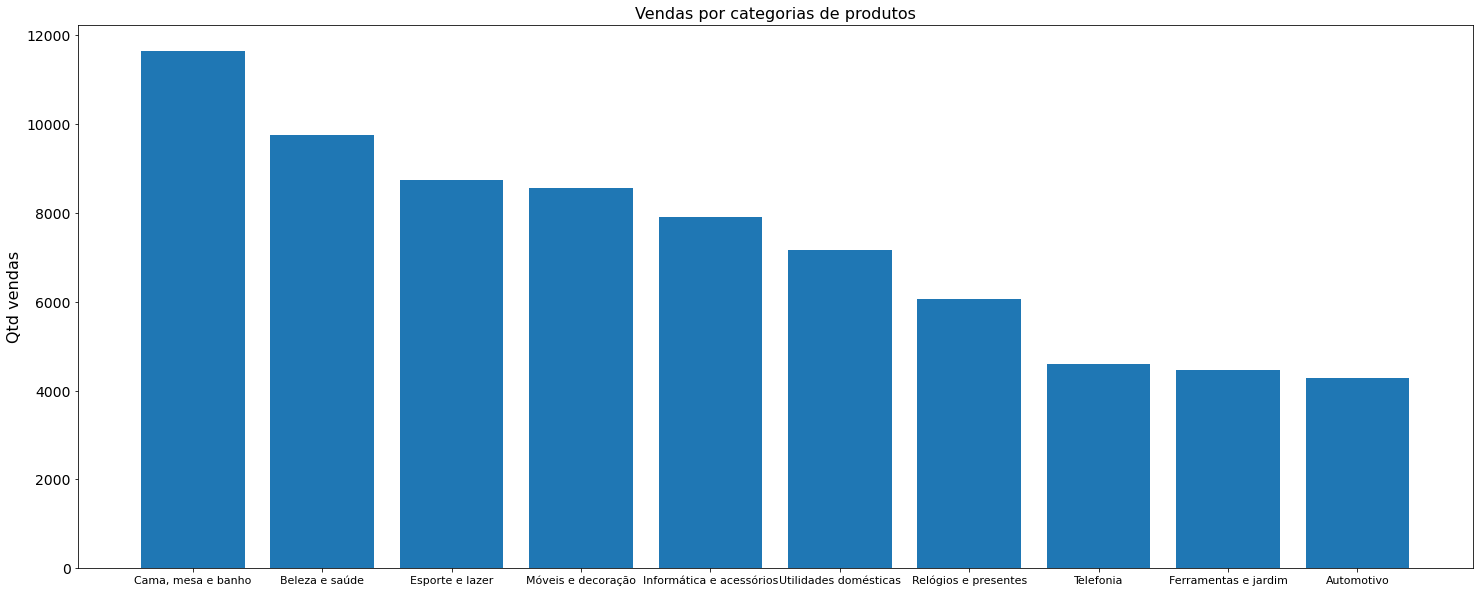

In [59]:
fig, ax = plt.subplots(figsize=(25,10))
lista = ['Cama, mesa e banho', 'Beleza e saúde', 'Esporte e lazer', 'Móveis e decoração', 'Informática e acessórios', 'Utilidades domésticas', 'Relógios e presentes', 'Telefonia', 'Ferramentas e jardim', 'Automotivo']
ax.bar(lista, categorias10['count'])
plt.title('Vendas por categorias de produtos', size = 16)

plt.ylabel('Qtd vendas', size = 16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=14)
plt.show()

In [55]:
categorias10.columns = ['Categoria Produto', 'Vendas']
categorias10

,Categoria Produto,Vendas
0,CAMA_MESA_BANHO,11650
1,BELEZA_SAUDE,9759
2,ESPORTE_LAZER,8733
3,MOVEIS_DECORACAO,8557
4,INFORMATICA_ACESSORIOS,7898
5,UTILIDADES_DOMESTICAS,7172
6,RELOGIOS_PRESENTES,6065
7,TELEFONIA,4603
8,FERRAMENTAS_JARDIM,4464
9,AUTOMOTIVO,4284


# --------------------------------------------------------------------------------------------------------------

# Avaliação de satisfação do cliente

In [122]:
df_merge = df_vendas.merge(df_avaliacao, on='sk_avaliacao', how= 'right')
avaliacao= df_merge['nr_nota_avaliacao'].value_counts().reset_index()
avaliacao

,nr_nota_avaliacao,count
0,5,41039
1,4,14114
2,1,9531
3,3,6111
4,2,2527


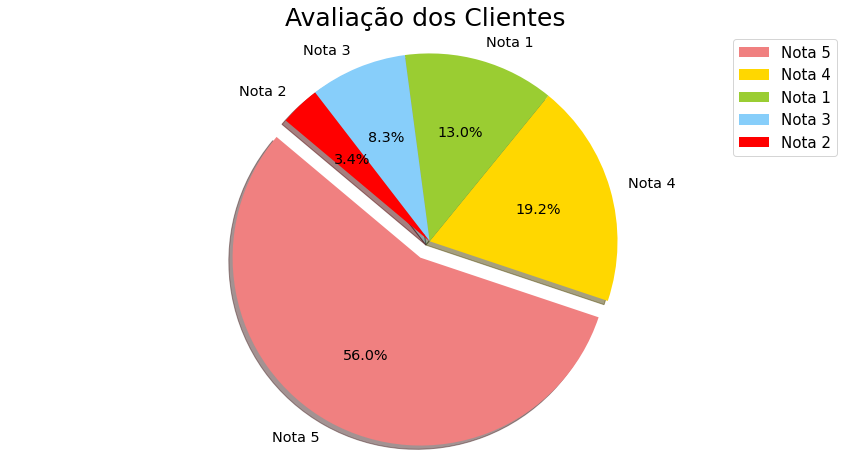

In [125]:
# Dados para plotar
labels =['Nota 5', 'Nota 4', 'Nota 1', 'Nota 3', 'Nota 2']
tamanhos = avaliacao['count']
plt.figure(figsize=(15, 8))
# definições
colors = ['lightcoral','gold', 'yellowgreen',  'lightskyblue', 'red']

# explodir 1ª fatia
explode = (0.1, 0, 0, 0, 0)  

# Plot
plt.pie(tamanhos, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'size': 'x-large'})


plt.legend(labels, loc="upper right", fontsize = 15)
plt.title('Avaliação dos Clientes', size = 25)
plt.axis('equal')
plt.show()

# --------------------------------------------------------------------------------------------------------------

# Atrasos nas entregas

In [26]:
df_merge = df_vendas.merge(df_prazo, on='sk_prazos', how= 'right')
lista = []
n = df_merge['nr_dias_de_atraso'].count()
for i in range(n):
    if df_merge['nr_dias_de_atraso'][i] <= 0:
        lista.append(0)
    elif df_merge['nr_dias_de_atraso'][i] >= 7:
        lista.append('+7')
    else:
        lista.append(df_merge['nr_dias_de_atraso'][i])
lista = pd.DataFrame(lista)
lista = lista.value_counts().reset_index()
lista.columns = ['Dias de atraso', 'Entregas']
lista

,Dias de atraso,Entregas
0,0,105531
1,+7,4431
2,1.0,1432
3,2.0,1055
4,3.0,753
5,4.0,657
6,5.0,610
7,6.0,521


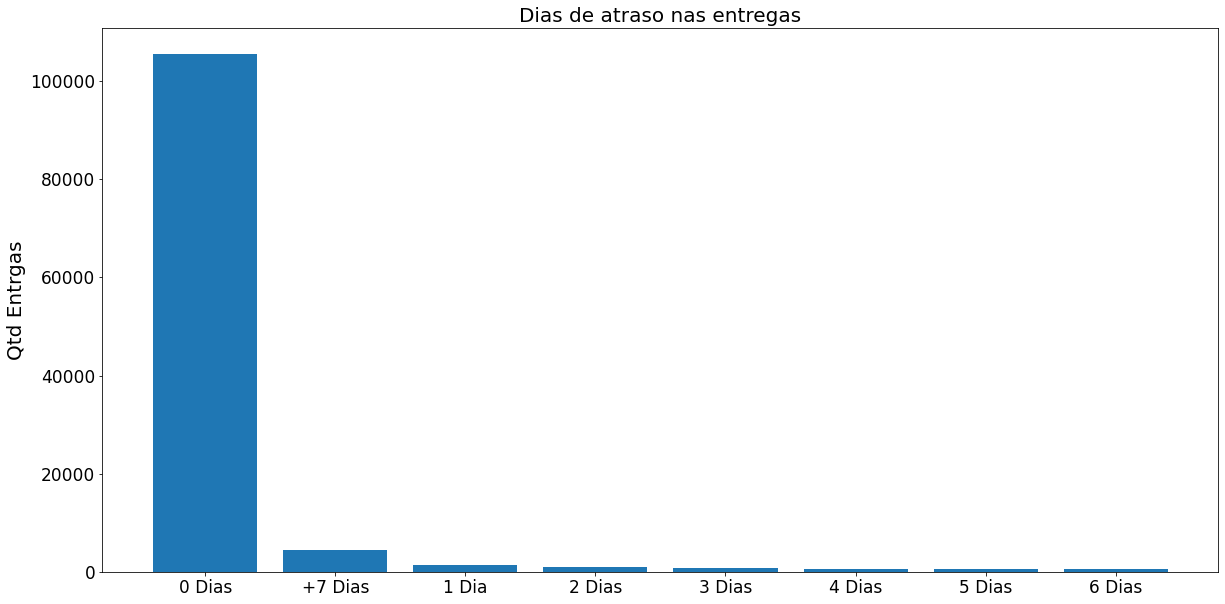

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
lista_x =['0 Dias', '+7 Dias', '1 Dia', '2 Dias', '3 Dias', '4 Dias', '5 Dias', '6 Dias']
ax.bar(lista_x, lista['Entregas'])
plt.title('Dias de atraso nas entregas', size = 20)

plt.ylabel('Qtd Entrgas', size = 20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [35]:
df_merge = df_vendas.merge(df_prazo, on='sk_prazos', how= 'right')
lista = []
n = df_merge['nr_dias_de_atraso'].count()
for i in range(n):
    if df_merge['nr_dias_de_atraso'][i] <= 0:
        lista.append('No prazo')
    else:
        lista.append('Atrasado')
lista = pd.DataFrame(lista)
lista = lista.value_counts().reset_index()
lista.columns = ['Situação', 'Entregas']
lista

,Situação,Entregas
0,No prazo,105531
1,Atrasado,9482


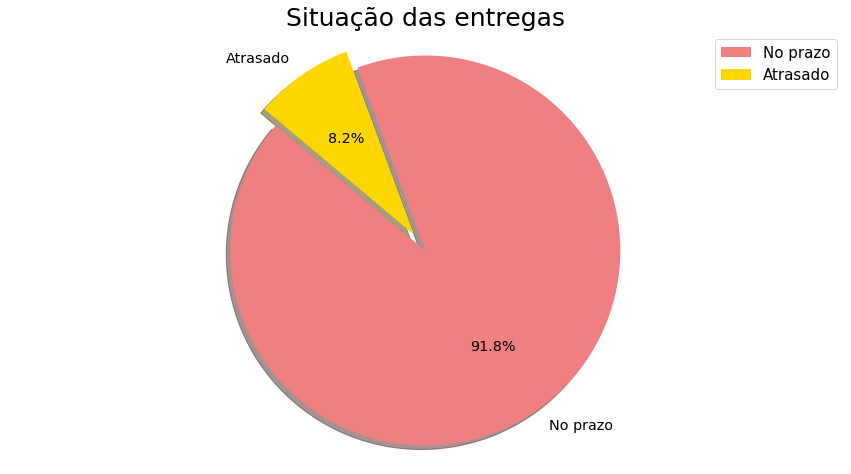

In [37]:
# Dados para plotar
labels =['No prazo', 'Atrasado']
tamanhos = lista['Entregas']
plt.figure(figsize=(15, 8))
# definições
colors = ['lightcoral','gold']

# explodir 1ª fatia
explode = (0.1, 0)  

# Plot
plt.pie(tamanhos, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'size': 'x-large'})


plt.legend(labels, loc="upper right", fontsize = 15)
plt.title('Situação das entregas', size = 25)
plt.axis('equal')
plt.show()